# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 194MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [7]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

In [8]:
df.shape

(147972, 21)

In [9]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [10]:
df.head()

School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number         Reason  \
0   2015-2016          1224901  Pre-K/EI    811            1          Other   
1   2015-2016          1225098  Pre-K/EI   9302            1  Heavy Traffic   
2   2015-2016          1215800  Pre-K/EI    358            2  Heavy Traffic   
3   2015-2016          1215511  Pre-K/EI    331            2          Other   
4   2015-2016          1215828  Pre-K/EI    332            2          Other   

  Schools_Serviced             Occurred_On              Created_On   Boro  \
0             C353  10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM  Bronx   
1             C814  10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM  Bronx   
2             C195  09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM  Bronx   
3             C178  09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM  Bronx   
4             S176  09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM  Bronx   

   ... How_Long_Delayed Number_Of_Students_On_The_Bus  \
0  ...        10MINUTES                             5   
1  ...       25 MINUTES                             3   
2  ...       15 MINUTES                            12   
3  ...       10 minutes                            11   
4  ...        10MINUTES                            12   

   Has_Contractor_Notified_Schools Has_Contractor_Notified_Parents  \
0                              Yes                             Yes   
1                              Yes                             Yes   
2                              Yes                             Yes   
3                              Yes                             Yes   
4                              Yes                             Yes   

  Have_You_Alerted_OPT             Informed_On Incident_Number  \
0                   No  10/26/2015 08:40:00 AM             NaN   
1                   No  10/27/2015 07:11:00 AM             NaN   
2                  Yes  09/18/2015 07:38:00 AM             NaN   
3                  Yes  09/17/2015 08:12:00 AM             NaN   
4                   No  09/18/2015 07:45:00 AM             NaN   

          Last_Updated_On Breakdown_or_Running_Late School_Age_or_PreK  
0  10/26/2015 08:40:39 AM              Running Late              Pre-K  
1  10/27/2015 07:11:22 AM              Running Late              Pre-K  
2  09/18/2015 07:38:44 AM              Running Late              Pre-K  
3  09/17/2015 08:12:08 AM              Running Late              Pre-K  
4  09/18/2015 07:56:40 AM              Running Late              Pre-K  

[5 rows x 21 columns]

In [11]:
df.sample(5)

School_Year  Busbreakdown_ID           Run_Type  Bus_No Route_Number  \
42821    2015-2016          1263105  Special Ed AM Run  NI8211         K080   
118116   2016-2017          1339317  Special Ed AM Run   52050         M127   
72235    2016-2017          1292950  Special Ed AM Run   1431D         X572   
133591   2016-2017          1355360  Special Ed AM Run    1666         X422   
140643   2017-2018          1362365           Pre-K/EI     424            4   

               Reason Schools_Serviced             Occurred_On  \
42821           Other            14059  04/18/2016 07:00:00 AM   
118116  Heavy Traffic            01450  04/07/2017 06:50:00 AM   
72235   Heavy Traffic            11476  10/18/2016 06:53:00 AM   
133591  Heavy Traffic            10444  06/05/2017 06:00:00 AM   
140643  Heavy Traffic             C445  07/18/2017 07:49:00 AM   

                    Created_On       Boro  ... How_Long_Delayed  \
42821   04/18/2016 07:10:00 AM   Brooklyn  ...           30 MIN   
118116  04/07/2017 07:03:00 AM  Manhattan  ...        25-30 MIN   
72235   10/18/2016 06:54:00 AM      Bronx  ...         20 mins.   
133591  06/05/2017 07:27:00 AM      Bronx  ...       1 hr 30min   
140643  07/18/2017 07:52:00 AM      Bronx  ...          30 MINS   

       Number_Of_Students_On_The_Bus  Has_Contractor_Notified_Schools  \
42821                              5                              Yes   
118116                             1                              Yes   
72235                              0                              Yes   
133591                             0                              Yes   
140643                             7                              Yes   

       Has_Contractor_Notified_Parents Have_You_Alerted_OPT  \
42821                              Yes                   No   
118116                             Yes                  Yes   
72235                              Yes                   No   
133591                             Yes                  Yes   
140643                             Yes                   No   

                   Informed_On Incident_Number         Last_Updated_On  \
42821   04/18/2016 07:10:00 AM             NaN  04/18/2016 07:10:32 AM   
118116  04/07/2017 07:03:00 AM             NaN  04/07/2017 07:03:05 AM   
72235   10/18/2016 06:54:00 AM             NaN  10/18/2016 10:23:13 AM   
133591  06/05/2017 07:27:00 AM             NaN  06/05/2017 07:27:45 AM   
140643  07/18/2017 07:52:00 AM             NaN  07/18/2017 07:52:36 AM   

       Breakdown_or_Running_Late School_Age_or_PreK  
42821               Running Late         School-Age  
118116              Running Late         School-Age  
72235               Running Late         School-Age  
133591              Running Late         School-Age  
140643              Running Late              Pre-K  

[5 rows x 21 columns]

In [12]:
df.tail()

School_Year  Busbreakdown_ID             Run_Type  Bus_No Route_Number  \
147967   2016-2017          1338452             Pre-K/EI    9345            2   
147968   2016-2017          1341521             Pre-K/EI    0001            5   
147969   2016-2017          1353044    Special Ed PM Run  GC0112         X928   
147970   2016-2017          1353045    Special Ed PM Run   5525D         Q920   
147971   2016-2017          1353046  Project Read PM Run    2530         K617   

               Reason Schools_Serviced             Occurred_On  \
147967  Heavy Traffic             C530  04/05/2017 08:00:00 AM   
147968  Heavy Traffic             C579  04/24/2017 07:42:00 AM   
147969  Heavy Traffic            09003  05/25/2017 04:22:00 PM   
147970    Won`t Start            24457  05/25/2017 04:27:00 PM   
147971          Other            21436  05/25/2017 04:36:00 PM   

                    Created_On      Boro  ... How_Long_Delayed  \
147967  04/05/2017 08:10:00 AM     Bronx  ...            15-20   
147968  04/24/2017 07:44:00 AM     Bronx  ...          20 MINS   
147969  05/25/2017 04:28:00 PM     Bronx  ...        20-25MINS   
147970  05/25/2017 04:30:00 PM    Queens  ...              NaN   
147971  05/25/2017 04:37:00 PM  Brooklyn  ...            45min   

       Number_Of_Students_On_The_Bus  Has_Contractor_Notified_Schools  \
147967                             7                              Yes   
147968                             0                              Yes   
147969                             0                              Yes   
147970                             0                              Yes   
147971                             7                              Yes   

       Has_Contractor_Notified_Parents Have_You_Alerted_OPT  \
147967                             Yes                   No   
147968                             Yes                   No   
147969                             Yes                  Yes   
147970                             Yes                   No   
147971                             Yes                  Yes   

                   Informed_On Incident_Number         Last_Updated_On  \
147967  04/05/2017 08:10:00 AM             NaN  04/05/2017 08:10:15 AM   
147968  04/24/2017 07:44:00 AM             NaN  04/24/2017 07:44:15 AM   
147969  05/25/2017 04:28:00 PM        90323827  05/25/2017 04:34:36 PM   
147970  05/25/2017 04:30:00 PM             NaN  05/25/2017 04:30:07 PM   
147971  05/25/2017 04:37:00 PM             NaN  05/25/2017 04:37:37 PM   

       Breakdown_or_Running_Late School_Age_or_PreK  
147967              Running Late              Pre-K  
147968              Running Late              Pre-K  
147969              Running Late         School-Age  
147970                 Breakdown         School-Age  
147971              Running Late         School-Age  

[5 rows x 21 columns]

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [13]:
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [14]:
df.drop(['Busbreakdown_ID'], axis=1, inplace=True)

In [15]:
df.drop(['How_Long_Delayed'], axis=1, inplace=True)

In [16]:
df.drop(['Incident_Number'], axis=1, inplace=True)

In [17]:
for col in df:
  print(col,df[col].unique)

School_Year <bound method Series.unique of 0         2015-2016
1         2015-2016
2         2015-2016
3         2015-2016
4         2015-2016
            ...    
147967    2016-2017
147968    2016-2017
147969    2016-2017
147970    2016-2017
147971    2016-2017
Name: School_Year, Length: 147972, dtype: object>
Run_Type <bound method Series.unique of 0                    Pre-K/EI
1                    Pre-K/EI
2                    Pre-K/EI
3                    Pre-K/EI
4                    Pre-K/EI
                 ...         
147967               Pre-K/EI
147968               Pre-K/EI
147969      Special Ed PM Run
147970      Special Ed PM Run
147971    Project Read PM Run
Name: Run_Type, Length: 147972, dtype: object>
Bus_No <bound method Series.unique of 0            811
1           9302
2            358
3            331
4            332
           ...  
147967      9345
147968      0001
147969    GC0112
147970     5525D
147971      2530
Name: Bus_No, Length: 147972, dtype: object>


In [18]:
df.isnull().sum()

School_Year                           0
Run_Type                             89
Bus_No                                0
Route_Number                         88
Reason                              102
Schools_Serviced                      0
Occurred_On                           0
Created_On                            0
Boro                               6318
Bus_Company_Name                      0
Number_Of_Students_On_The_Bus         0
Has_Contractor_Notified_Schools       0
Has_Contractor_Notified_Parents       0
Have_You_Alerted_OPT                  0
Informed_On                           0
Last_Updated_On                       0
Breakdown_or_Running_Late             0
School_Age_or_PreK                    0
dtype: int64

In [19]:

def fill_with_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value[0])
    return series




In [20]:
df['Run_Type'] = df['Run_Type'].transform(fill_with_mode)

In [21]:
df.isnull().sum()

School_Year                           0
Run_Type                              0
Bus_No                                0
Route_Number                         88
Reason                              102
Schools_Serviced                      0
Occurred_On                           0
Created_On                            0
Boro                               6318
Bus_Company_Name                      0
Number_Of_Students_On_The_Bus         0
Has_Contractor_Notified_Schools       0
Has_Contractor_Notified_Parents       0
Have_You_Alerted_OPT                  0
Informed_On                           0
Last_Updated_On                       0
Breakdown_or_Running_Late             0
School_Age_or_PreK                    0
dtype: int64

In [22]:
df['Route_Number'] = df.groupby(['Run_Type', 'Bus_No'])['Route_Number'].transform(fill_with_mode)

In [23]:
#have 4 null and i will fill with mode
df['Route_Number'] = df['Route_Number'].transform(fill_with_mode)

In [24]:
df.isnull().sum()

School_Year                           0
Run_Type                              0
Bus_No                                0
Route_Number                          0
Reason                              102
Schools_Serviced                      0
Occurred_On                           0
Created_On                            0
Boro                               6318
Bus_Company_Name                      0
Number_Of_Students_On_The_Bus         0
Has_Contractor_Notified_Schools       0
Has_Contractor_Notified_Parents       0
Have_You_Alerted_OPT                  0
Informed_On                           0
Last_Updated_On                       0
Breakdown_or_Running_Late             0
School_Age_or_PreK                    0
dtype: int64

In [25]:
df['Reason'] = df.groupby(['Run_Type', 'Route_Number'])['Reason'].transform(fill_with_mode)

In [26]:
df.isnull().sum()

School_Year                           0
Run_Type                              0
Bus_No                                0
Route_Number                          0
Reason                                2
Schools_Serviced                      0
Occurred_On                           0
Created_On                            0
Boro                               6318
Bus_Company_Name                      0
Number_Of_Students_On_The_Bus         0
Has_Contractor_Notified_Schools       0
Has_Contractor_Notified_Parents       0
Have_You_Alerted_OPT                  0
Informed_On                           0
Last_Updated_On                       0
Breakdown_or_Running_Late             0
School_Age_or_PreK                    0
dtype: int64

In [27]:
#i have 2 null after fill null for (Reason) by this group (Run_Type and Route_Number)
df['Reason'] = df['Reason'].transform(fill_with_mode)

In [28]:
df.isnull().sum()

School_Year                           0
Run_Type                              0
Bus_No                                0
Route_Number                          0
Reason                                0
Schools_Serviced                      0
Occurred_On                           0
Created_On                            0
Boro                               6318
Bus_Company_Name                      0
Number_Of_Students_On_The_Bus         0
Has_Contractor_Notified_Schools       0
Has_Contractor_Notified_Parents       0
Have_You_Alerted_OPT                  0
Informed_On                           0
Last_Updated_On                       0
Breakdown_or_Running_Late             0
School_Age_or_PreK                    0
dtype: int64

In [29]:
df['Boro'] = df.groupby(['Bus_No'])['Boro'].transform(fill_with_mode)

In [30]:
df.isnull().sum()

School_Year                          0
Run_Type                             0
Bus_No                               0
Route_Number                         0
Reason                               0
Schools_Serviced                     0
Occurred_On                          0
Created_On                           0
Boro                               210
Bus_Company_Name                     0
Number_Of_Students_On_The_Bus        0
Has_Contractor_Notified_Schools      0
Has_Contractor_Notified_Parents      0
Have_You_Alerted_OPT                 0
Informed_On                          0
Last_Updated_On                      0
Breakdown_or_Running_Late            0
School_Age_or_PreK                   0
dtype: int64

In [31]:
#i will fill null with Bus_No and still 210 is null
df['Boro'] = df['Boro'].transform(fill_with_mode)

In [32]:
df.isnull().sum()

School_Year                        0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [33]:
df.duplicated().sum()


36

In [34]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()


0

In [38]:
import plotly.express as px

fig = px.bar(df, x='Run_Type')
fig.show()

In [39]:
fig = px.bar(df, x='Bus_No')
fig.show()

In [49]:

fig = px.bar(df, x='Bus_No', y='Number_Of_Students_On_The_Bus')
fig.show()

In [50]:
numbric = df.select_dtypes(include=['int64']).columns
categorical = df.select_dtypes(include=['object']).columns

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numbric]= scaler.fit_transform(df[numbric])

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical:
  df[col] = le.fit_transform(df[col])

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [75]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
Dropout(0.2)
model.add(Dense(16, activation='relu'))
Dropout(0.3)
model.add(Dense(1, activation='sigmoid'))
model.summary()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [76]:
model.compile(optimizer='adam' ,loss='binary_crossentropy' , metrics=['accuracy'] )


## Training the Model
Train the ANN model using the training data.

In [77]:
history= model.fit(X_train, y_train,
                  epochs=10,
                  validation_data=(X_val,y_val) ,
                  batch_size=32,
                  verbose=1)

Epoch 1/10
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8072 - loss: 86.5881 - val_accuracy: 0.7373 - val_loss: 7.2415
Epoch 2/10
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8054 - loss: 21.6963 - val_accuracy: 0.8804 - val_loss: 18.5653
Epoch 3/10
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8045 - loss: 22.8810 - val_accuracy: 0.8778 - val_loss: 8.3776
Epoch 4/10
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8009 - loss: 16.6966 - val_accuracy: 0.8818 - val_loss: 15.5093
Epoch 5/10
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8006 - loss: 13.7712 - val_accuracy: 0.8765 - val_loss: 3.0584
Epoch 6/10
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8007 - loss: 11.9839 - val_accuracy: 0.8530 - val_loss: 7.3287
Epoch 7/10
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7995 - loss: 10.6960 - val_accuracy: 0.8736 - val_loss: 12.2180
Epoch 8/10
2589/2589 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8016 - los

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [81]:
model.evaluate(X_train,y_train)

2589/2589 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8764 - loss: 15.0364


[14.965585708618164, 0.877444326877594]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [82]:
y_pred = model.predict(X_test)

1387/1387 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

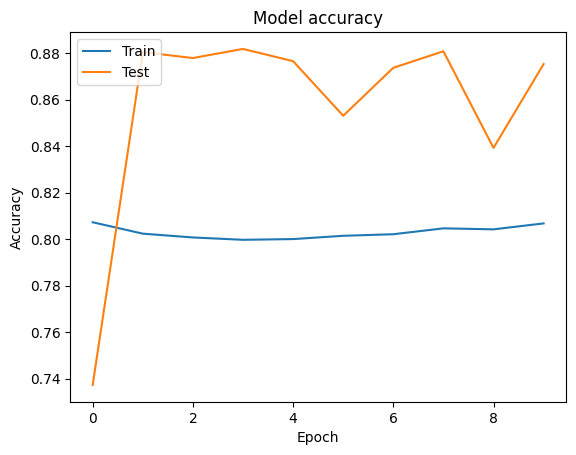

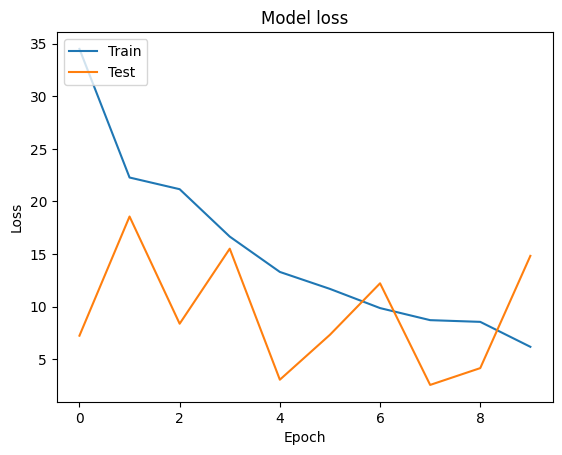

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



## Save the Model
Save the trained model for submission.

In [64]:
model.save('ANN.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1. i use StanderScaler for numbric and all catigrcal i use lableEncoder

2. one input layer with 32 neurons, activation functions relu  and  and one hidden layers 16  neurons, activation functions relu and one output layers 1 neurons, activation functions sigmoid

3.batch size 32, number of epochs=10, and optimizer is adam. diffrint value he come overfining

4.i use binary_crossentropy for loss funcation and in evaluation accurcy

5. befor i add 2 drop out the model is overfitting and i will add one and train and after that i will add secand dropout

6.accurcy

7. that goof accuracy and loss i dont need to use in 10 epoch if i add moer that mabye use erlay stop

8.Dropout


*the target have oversampling but i add Dropout out

*in the first run i have get good accurcy and loss and afer that i loss inter net and i have issue in the train i write all tis point in the frist run and this issuse come in the last time in exam